In [20]:
from IPython.display import display, Image

# Task 1

## 1. Finding in PDB

https://www.rcsb.org/structure/2OSL#entity-2

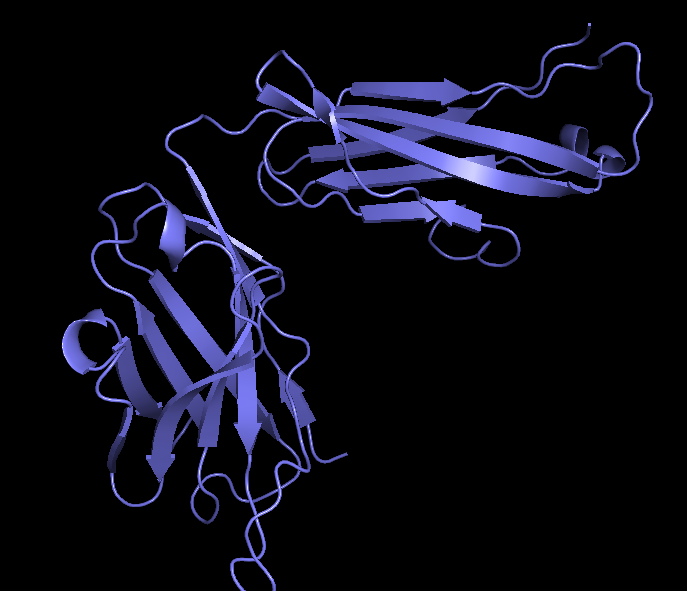

In [23]:
display(Image('img/pdb_heavy_chain.png'))

### Extract variable domain (I'm guessing this is what "V" in "VH" stands for...) from structure

In [ ]:
s = 'QVQLQQPGAELVKPGASVKMSCKASGYTFTSYNMHWVKQTPGRGLEWIGAIYPGNGDTSYNQKFKGKATLTADKSSSTAYMQLSSLTSEDSAVYYCARSTYYGGDWYFNVWGAGTTVTVSAA'

In [29]:
from Bio import SeqIO
pdbfile = '2osl_H.pdb'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    with open(pdbfile, 'r') as handle:
        seq = next(SeqIO.parse(handle, "pdb-atom")).seq
seq = str(seq)

In [32]:
for i, (c1, c2) in enumerate(zip(s, seq)):
    assert c1 == c2
print(i)

121


122 first residues...

In [96]:
import warnings
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.PDBIO import PDBIO
from Bio.PDB.PDBIO import Select

parser = PDBParser(PERMISSIVE=1) # ignore some PDB specification problems

struct_id = '2osl_H'
filename = '2osl_H.pdb'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    struct = parser.get_structure(struct_id, filename)
    
class VarSel(Select):
    def accept_residue(self, res):
        return res.get_id()[1] <= 122

io = PDBIO()
io.set_structure(struct)
io.save('2osl_VH.pdb', VarSel())

In [102]:
RES.get_parent()

<Chain id=H>

In [101]:
dir(RES)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_generate_full_id',
 '_id',
 '_reset_full_id',
 'add',
 'child_dict',
 'child_list',
 'copy',
 'detach_child',
 'detach_parent',
 'disordered',
 'flag_disordered',
 'full_id',
 'get_atom',
 'get_atoms',
 'get_full_id',
 'get_id',
 'get_iterator',
 'get_level',
 'get_list',
 'get_parent',
 'get_resname',
 'get_segid',
 'get_unpacked_list',
 'has_id',
 'id',
 'insert',
 'internal_coord',
 'is_disordered',
 'level',
 'parent',
 'resname',
 'segid',
 'set_parent',
 'sort',
 'transform',
 'xtra']

In [98]:
RES = next(struct.get_residues())

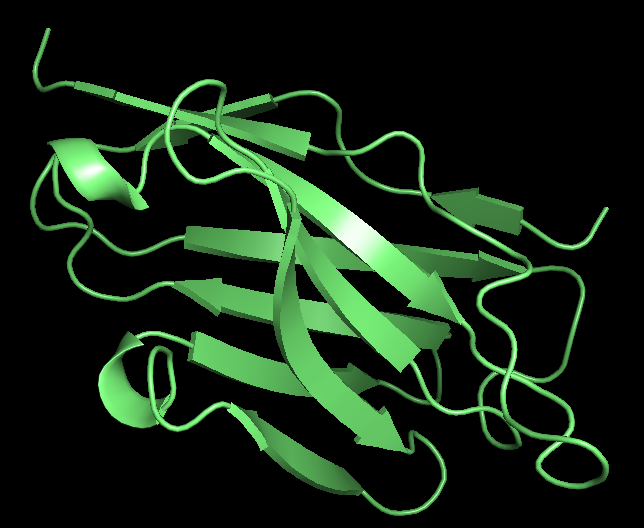

In [41]:
display(Image('img/pdb_heavy_chain_var.png'))

## 2. Modeller
### Homologue
https://www.rcsb.org/structure/3BKY#entity-1
	
Sequence Identity: 87%

heavy chain:

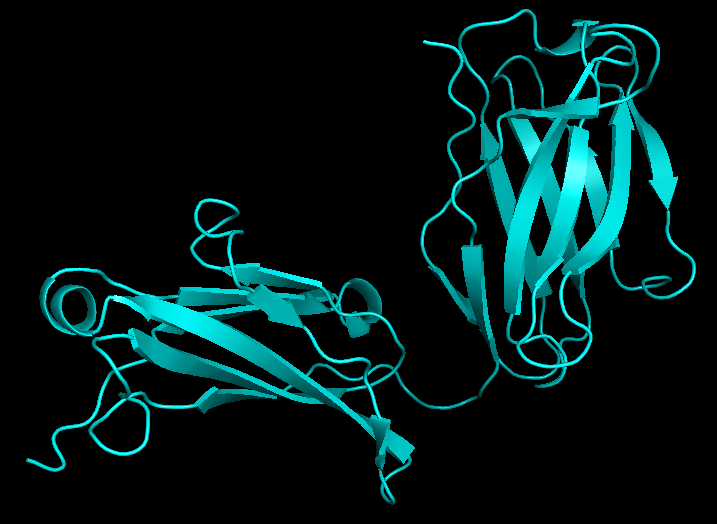

In [43]:
display(Image('img/pdb_hom_heavy_chain.png'))

We also need to select variable domain. There's one insertion in the homologue (according to the alignment file from pdb search results page), so select first 123 residues.

In [51]:
parser = PDBParser(PERMISSIVE=1) # ignore some PDB specification problems

struct_id = '3bky_H'
filename = '3bky_H.pdb'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    struct = parser.get_structure(struct_id, filename)
    
class VarSel(Select):
    def accept_residue(self, res):
        return res.get_id()[1] <= 123

io = PDBIO()
io.set_structure(struct)
io.save('3bky_VH.pdb', VarSel())

Structure of homologue:

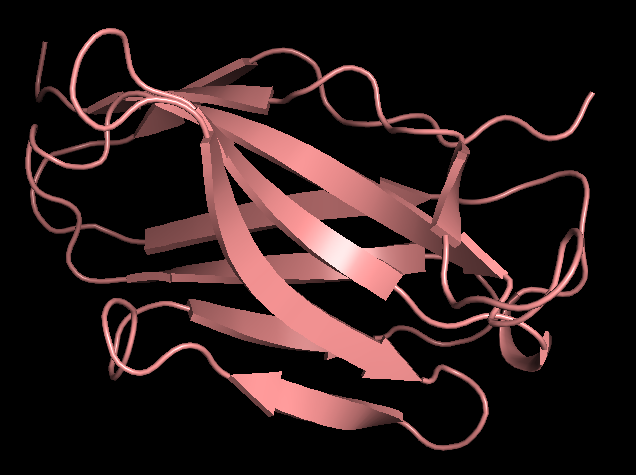

In [55]:
display(Image('img/pdb_hom_heavy_chain_var.png'))

Runnning Modeller:  `cd modeller && python hw-model.py && cd ../`

### b-factor
`spectrum b, blue_white_red`

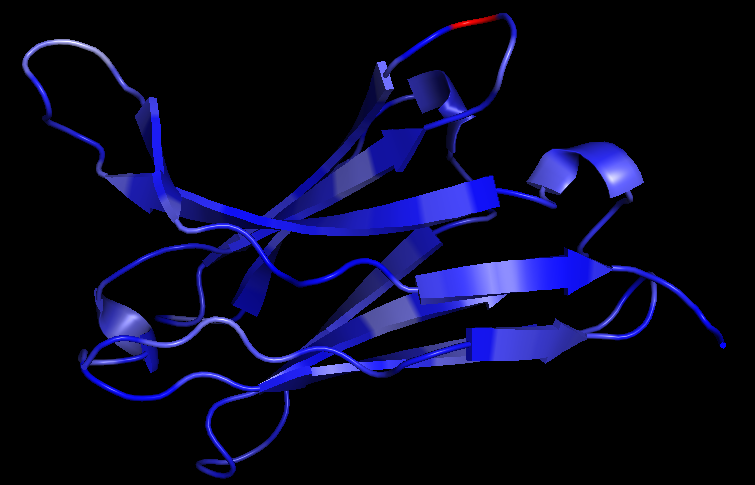

In [71]:
display(Image('img/task1/modeller_b-factor.png'))

The red spot is where the first sequence mismatches take place.

### Aligning onto native structure
Blue is Modeller, white-ish is native.

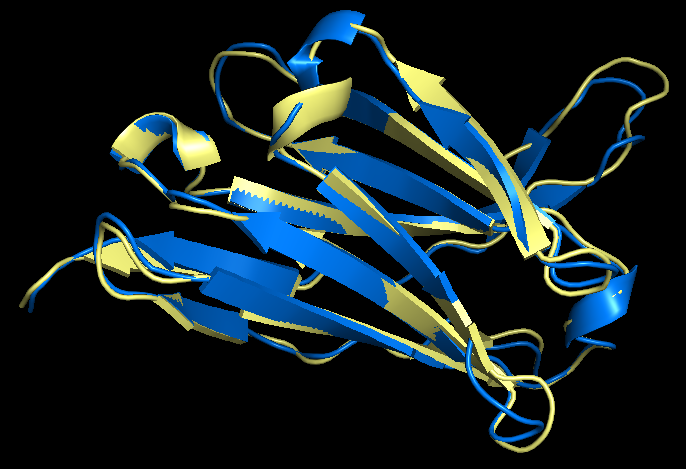

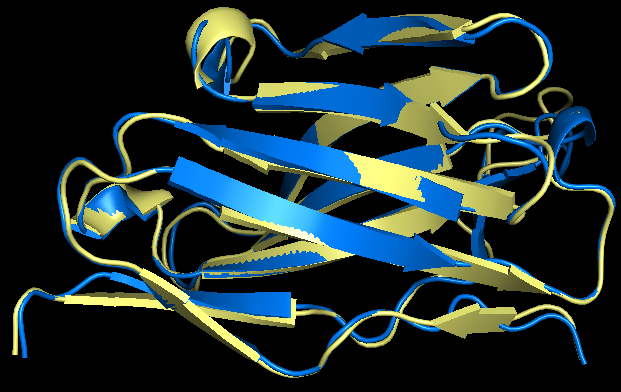

In [87]:
display(Image('img/task1/modeller_aligned1.png'))
display(Image('img/task1/modeller_aligned2.png'))

Generally hits, but some beta-sheets start or end in a different position, missing by 1-2 residues, perhaps because homologue's length is a bit higher.

## 3. AlfaFold2 

https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/beta/AlphaFold2_advanced.ipynb

with default parameters and no relaxation

### b-factor
`spectrum b, blue_white_red`

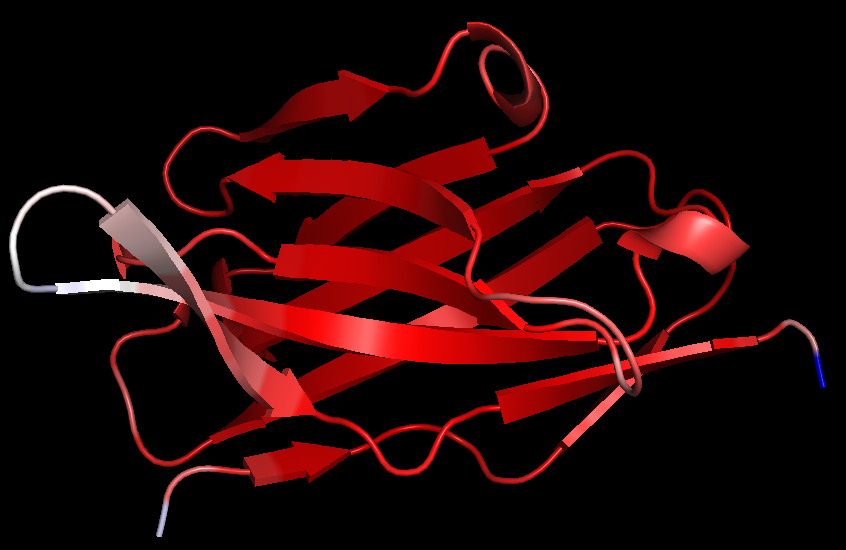

In [66]:
display(Image('img/task1/AF2_b-factor.png'))

AlphaFold2 b-factor doesn't seep to convey any meaning... because for some reason it says here that the "dense" part of the molecule has higher b-factor. And also because minimum and maximum values are rather close (76.3 and 98.7)

### Aligning onto native structure
Red is AF2, white-ish is original.

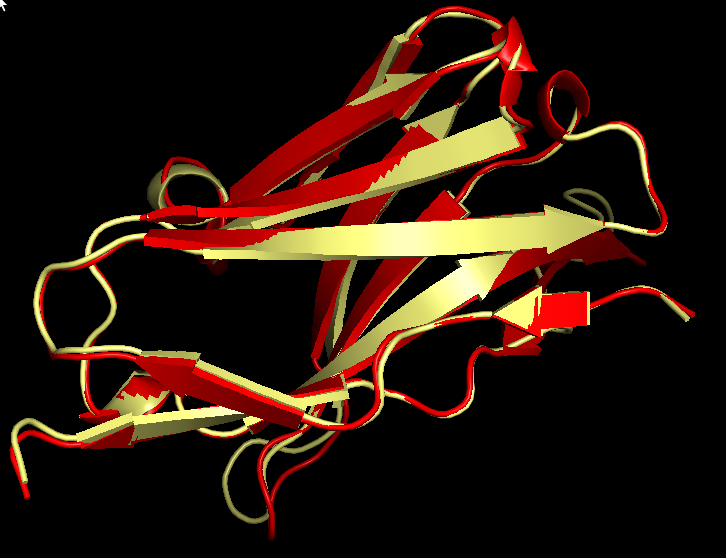

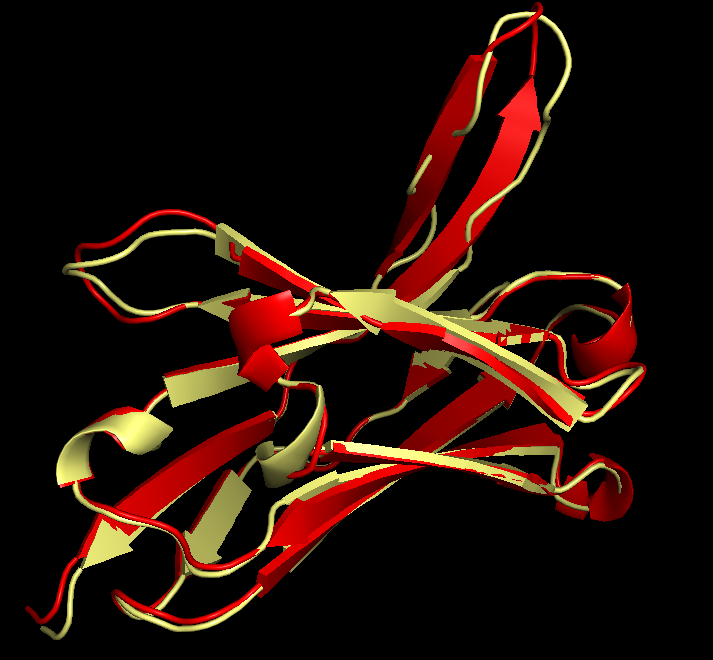

In [65]:
display(Image('img/task1/AF2_aligned1.png'))
display(Image('img/task1/AF2_aligned2.png'))

Predicted structure aligns well, and mostly "hits" with secondary structure. Although, AF2 has a tendency to extend beta-sheets into "unstructured" parts, or predict secondary sturcture where in the original file where was none.

Is _could_ be due to the fact that the original stucture was obtained via X-ray difraction, and these "unstructured" regions were not resolved there.

## 4. Comparison of predicted structures
Red is AF2, blue is Modeller

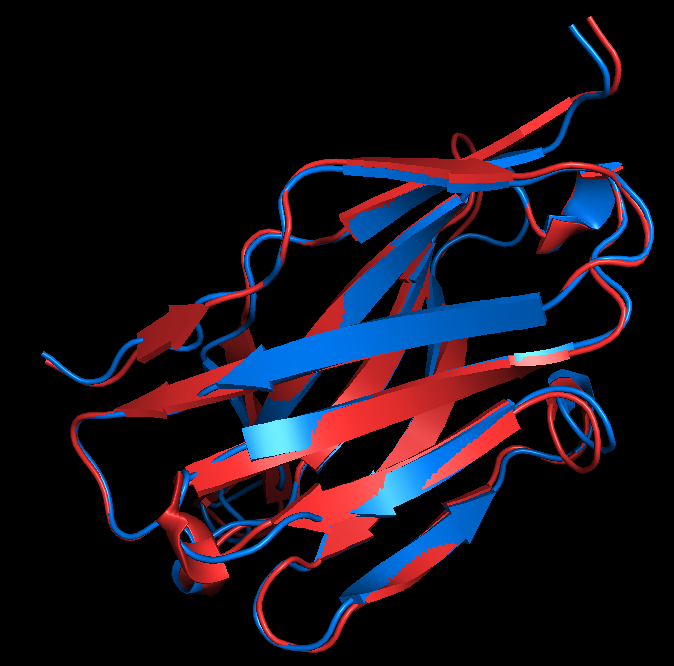

In [89]:
display(Image('img/task1/AF2_vs_modeller1.png'))

Alphafold tends to predict larger secondary structures. 
I remember from the lecture that AF2 is better at predicting ordered parts of the molecule, maybe because that is generally what it does - extends structures while possible. Also, AF2 did't

Both pdb sturctures (for VH sequence and its homologue) are obtained using X-ray diffraction.
X-ray diffraction might fail in mobile parts of the molecule, but I don't think that it failed in the backbone in the beta-sheets. 

# Task 2
## Native structure
https://www.rcsb.org/structure/6VJA#entity-1
```python
fetch 6vja
split_chains
save task2_chains.pdb, (6vja_L, 6vja_H, 6vja_C)
```

In [116]:
import warnings
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.PDBIO import PDBIO
from Bio.PDB.PDBIO import Select

parser = PDBParser(PERMISSIVE=1) # ignore some PDB specification problems

struct_id = 'task2'
filename = 'task2_chains.pdb'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    struct = parser.get_structure(struct_id, filename)
    
class Sel(Select):
    def accept_residue(self, res):
        c = res.get_parent()
        if c.get_id() != 'C':   # other chains are completely covered by sequences
            return True
        return 163 <= res.get_id()[1] <= 187

io = PDBIO()
io.set_structure(struct)
io.save('task2.pdb', Sel())

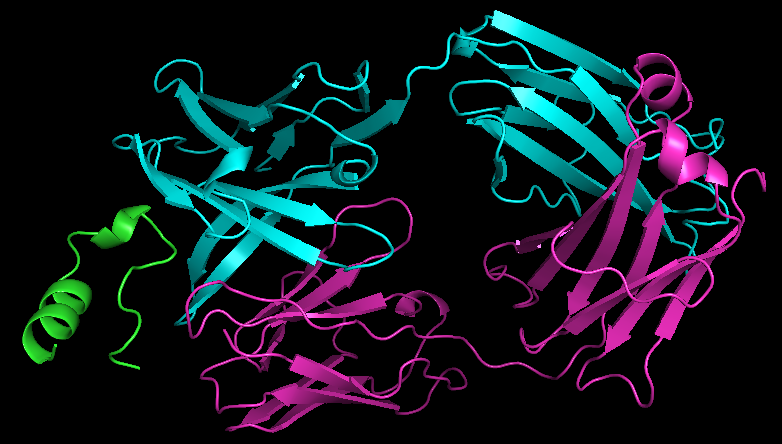

In [117]:
display(Image('img/task2/native.png'))

## AF2
Default parameters, this time with relaxation...

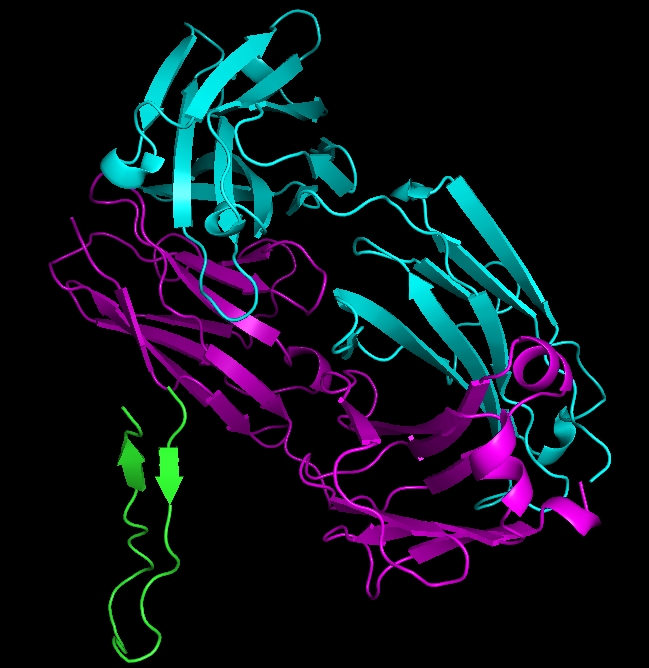

In [119]:
display(Image('img/task2/af2.png'))

We can see that AF2 could not find the true place of the CD20 peptide, though it did somewhat accurately predict heavy and light AB chains, despite even knowing that the whole complex is symmetric and consists of 2 such units.

Here, as before, native structure is white-ish and AF2 prediction is red.

heavy chains:


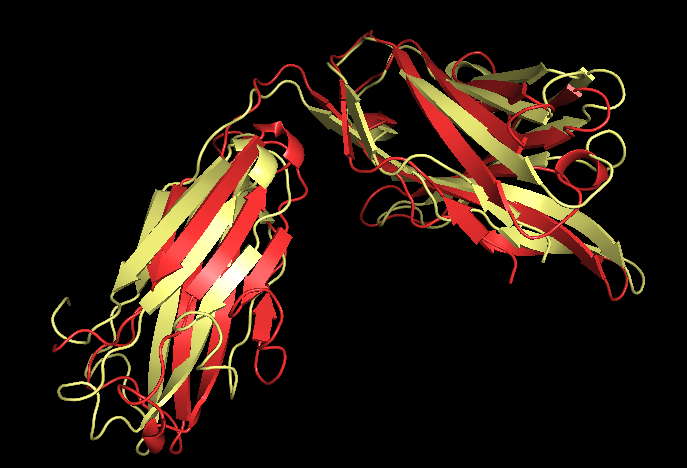

light chains:


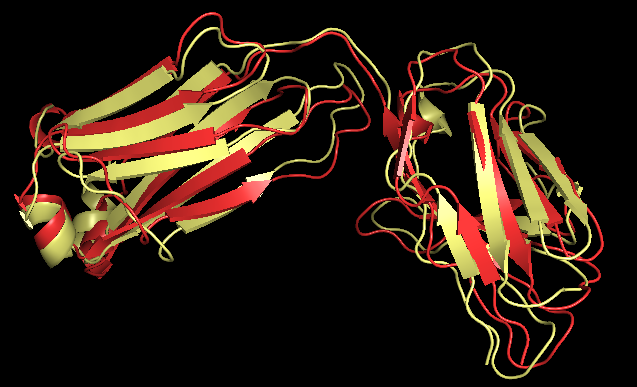

In [121]:
print('heavy chains:')
display(Image('img/task2/heavy.png'))
print('light chains:')
display(Image('img/task2/light.png'))

In AF2 the chains actually seem, only the angle between domains is slightly bigger then should be. The result seems better then in the first task, probably because of relaxation.

Thus, AF2 seems to manage to predict structure of single-chains molecules (or better yet, molecules consisting of a single structural domain...), but fails to build a complex of several proteins (especially if we don't tell him that there is actually a symmetric structure consisting of several units).